# DATASET 1 MODEL TRAINING

## Import Library

In [1]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score


# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score



In [2]:
import numpy as np
import tensorflow as tf
import random as python_random

def reset_seeds():
    np.random.seed(123) 
    python_random.seed(123)
    tf.random.set_seed(1234)

reset_seeds() 

## Importing the dataset

In [3]:

dataset = pd.read_csv("/Users/jillkathleen/Desktop/Phishing-Analysis-Detection/Back-End/Extracted CSVs/from FeatureExtraction/Data-1/D1-final-extracted.csv")


In [4]:
dataset

,domain,ip_present,at_present,url_length,url_depth,redirection,https_domain,short_url,prefix/suffix,dns_record,web_traffic,domain_age,domain_end,dot_count,specialchar_count,subdom_count,label
0,NaN,0,0,0,3,0,0,0,0,0,1,1,1,1,4,1,0
1,NaN,0,0,1,3,0,0,0,0,0,1,1,1,0,2,0,0
2,NaN,0,0,0,3,0,0,0,0,0,0,1,1,0,4,0,0
3,NaN,0,0,0,1,0,0,0,0,0,1,1,1,0,1,0,0
4,NaN,0,0,0,2,0,0,0,0,0,1,1,1,0,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12943,norwayposten.blogspot.com,0,0,1,3,0,0,1,0,1,1,1,1,1,6,1,1
12944,security-team-verifypayees.com,0,0,0,1,0,0,0,1,0,1,0,1,1,4,0,1
12945,or-ca.love,0,0,0,5,0,0,0,1,0,1,1,1,0,8,0,1
12946,newdelete-payee.com,0,0,0,2,0,0,0,1,0,1,0,1,0,5,0,1


In [5]:
# Look for missing values
dataset.isnull().sum()   

# No missing values found, so no need to drop or replace any value

domain               9058
ip_present              0
at_present              0
url_length              0
url_depth               0
redirection             0
https_domain            0
short_url               0
prefix/suffix           0
dns_record              0
web_traffic             0
domain_age              0
domain_end              0
dot_count               0
specialchar_count       0
subdom_count            0
label                   0
dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    9058
1    3890
Name: label, dtype: int64

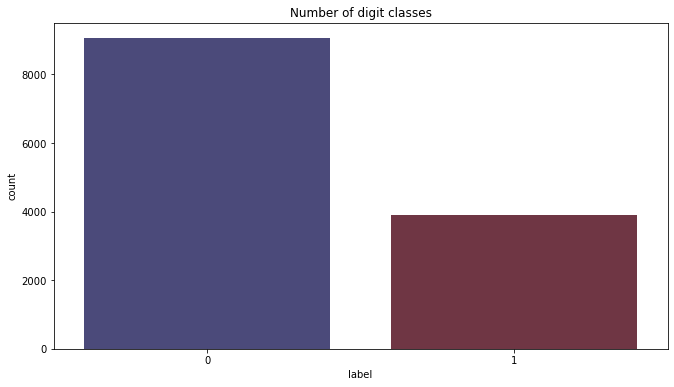

In [6]:
# visualize number of label classes

plt.figure(figsize=(11,6))
g = sns.countplot(dataset['label'], palette="icefire")
plt.title("Number of digit classes")
dataset['label'].value_counts()

In [7]:
# Shuffle
# shuffle dataset **once**, but reliably so that each run yields the same results

dataset_shuffle = shuffle(dataset, random_state=42)

dataset_shuffle

,domain,ip_present,at_present,url_length,url_depth,redirection,https_domain,short_url,prefix/suffix,dns_record,web_traffic,domain_age,domain_end,dot_count,specialchar_count,subdom_count,label
7277,NaN,0,0,1,5,0,0,0,0,0,1,1,1,0,5,1,0
5321,NaN,0,0,0,3,0,0,0,0,0,1,1,1,0,3,1,0
8420,NaN,0,0,0,4,0,0,0,0,0,1,1,1,1,3,0,0
1739,NaN,0,0,0,1,0,0,0,0,0,1,1,1,0,1,0,0
2677,NaN,0,0,0,3,0,0,0,0,0,1,1,1,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,errorupdatesupport.com,0,0,0,1,0,0,1,0,0,1,0,0,0,5,0,1
5191,NaN,0,0,1,6,0,0,1,0,0,1,1,1,0,7,1,0
5390,NaN,0,0,1,2,0,0,0,0,0,1,1,1,0,3,0,0
860,NaN,0,0,0,3,0,0,0,0,0,1,1,1,0,3,0,0


In [8]:
# Separating & assigning features and target columns to X & y

y = dataset_shuffle['label']
X = dataset_shuffle.drop(['domain', 'label'], axis=1)


X.shape, y.shape

((12948, 15), (12948,))

# Split Train/Val/Test

In [9]:
# Spliting the dataset into Training, Validation, and Test Set

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, 
                                                    test_size=0.4, random_state=42)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)


X_train.shape, X_test.shape, X_val.shape

((7768, 15), (2590, 15), (2590, 15))

In [10]:
# Converting target variables from dataframe to an array

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)
y_val = np.ravel(y_val)

In [11]:
## Normalize data using StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)


In [12]:

print(X_train)
print('')
print(type(X_train))


[[ 0.         -0.11818141  1.38337574 ... -0.53547345  0.16204039
   1.38495729]
 [ 0.         -0.11818141 -0.72286941 ... -0.53547345 -0.34911889
  -0.72204393]
 [ 0.         -0.11818141 -0.72286941 ...  1.86750621 -0.86027818
   1.38495729]
 ...
 [ 0.         -0.11818141 -0.72286941 ... -0.53547345 -0.34911889
  -0.72204393]
 [ 0.         -0.11818141 -0.72286941 ... -0.53547345 -0.34911889
  -0.72204393]
 [ 0.         -0.11818141 -0.72286941 ... -0.53547345 -0.60469854
   1.38495729]]

<class 'numpy.ndarray'>


In [13]:
print(X_train.shape)

print(X_test.shape)

print(X_val.shape)


(7768, 15)
(2590, 15)
(2590, 15)


In [14]:

## Displaying the dimensions present in the dataset

print("Dimensions of the original dataset :",X.shape[0], "rows and",X.shape[1],"columns\n")

print("Dimensions of the training dataset :",X_train.shape[0], "rows and",X_train.shape[1],"columns\n")

print("Dimensions of the testing dataset :",X_test.shape[0], "rows and",X_test.shape[1],"columns\n")

print("Dimensions of the validation dataset :",X_val.shape[0], "rows and",X_val.shape[1],"columns\n")


Dimensions of the original dataset : 12948 rows and 15 columns

Dimensions of the training dataset : 7768 rows and 15 columns

Dimensions of the testing dataset : 2590 rows and 15 columns

Dimensions of the validation dataset : 2590 rows and 15 columns



## Machine Learning Models & Training

In [15]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []
acc_val = []

#function to call for storing the results
def storeResults(model, a,b,c):
    ML_Model.append(model)
    acc_train.append("{:.2f}%" .format (a, 2))
    acc_test.append("{:.2f}%" .format (b, 2))
    acc_val.append("{:.2f}%" .format (c, 2))
    
   

## Decision Tree

In [16]:
## Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

## instantiate the DecisionTreeClassifier model with criterion gini index
tree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=17)

## fit the model 
tree.fit(X_train, y_train)

## predicting the target value from the model for the samples
y_pred_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)
y_val_tree = tree.predict(X_val)


## Computing the accuracy of the model performance
acc_train_tree = (accuracy_score(y_train,y_train_tree)*100)
acc_pred_tree = (accuracy_score(y_test,y_pred_tree)*100)
acc_val_tree = (accuracy_score(y_val,y_val_tree)*100)

print("Decision Tree: Accuracy on training Data: %.2f%%" % (acc_train_tree))
print("Decision Tree: Accuracy on TEST Data: %.2f%%" % (acc_pred_tree))
print("Decision Tree: Accuracy on validation Data: %.2f%%" % (acc_val_tree))

      
#Note: y_test are the true class labels 
#y_test_tree are the predicted class labels in the test set



#=============
#print the scores on training and test set
#print('Training set score: {:.4f}',round(tree.score(X_train, y_train) * 100,2), "%")
#print('Test set score: {:.4f}',round(tree.score(X_test, y_test) * 100,2), "%")


Decision Tree: Accuracy on training Data: 92.24%
Decision Tree: Accuracy on TEST Data: 92.12%
Decision Tree: Accuracy on validation Data: 92.08%


In [17]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.

storeResults('Decision Tree', acc_train_tree, acc_pred_tree, acc_val_tree )


In [18]:
## Evaluation

#Evaluating predictions with test labels
print ("Accuracy : ", accuracy_score(y_test,y_pred_tree)*100)
print('')
print ("Report : ",  classification_report(y_test, y_pred_tree))

Accuracy :  92.12355212355212

Report :                precision    recall  f1-score   support

           0       0.90      1.00      0.95      1774
           1       0.99      0.76      0.86       816

    accuracy                           0.92      2590
   macro avg       0.95      0.88      0.90      2590
weighted avg       0.93      0.92      0.92      2590



<AxesSubplot:title={'center':'Confusion Matrix - Decision Tree'}>

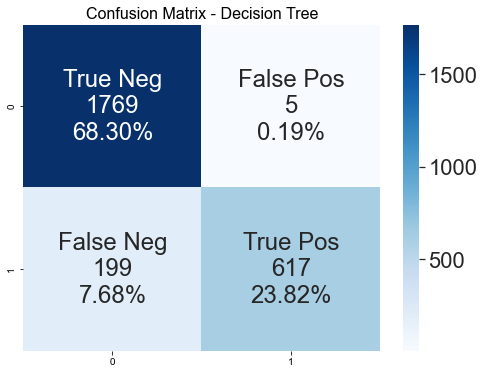

In [19]:
# Predicting results for test dataset
y_pred = tree.predict(X_test)

##Get the confusion matrix
tree_matrix = confusion_matrix(y_test, y_pred_tree)

## Confusion Matrix table

group_names = ['True Neg','False Pos','False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                tree_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     tree_matrix.flatten()/np.sum(tree_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)


# Labels, title and ticks
fig, ax = plt.subplots(figsize=(8, 6))
sns.set(font_scale=2.0) # Adjust to fit
title_font = {'size':'16'}  # Adjust to fit
ax.set_title('Confusion Matrix - Decision Tree', fontdict=title_font);

# plot
sns.heatmap(tree_matrix, annot=labels, fmt='', cmap='Blues', ax=ax)

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
   
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.2f}\nPrecision={:0.2f}\nRecall={:0.2f}\nF1 Score={:0.2f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.2f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

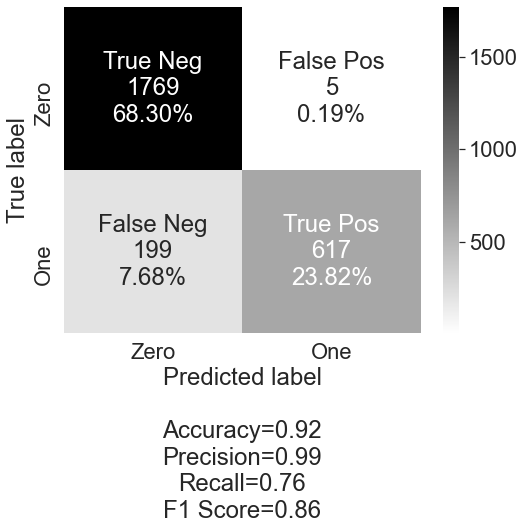

In [21]:
labels = ['True Neg','False Pos','False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(tree_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='binary', figsize=(8,6))

# Random Forest

In [22]:
## Random Forest model
from sklearn.ensemble import RandomForestClassifier

## instantiate the model
forest = RandomForestClassifier(n_estimators=10, min_samples_leaf=2, max_features=0.1, random_state=17)

## fit the model 
forest.fit(X_train, y_train)

## predicting the target value from the model for the samples
y_pred_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)
y_val_forest = forest.predict(X_val)


## Computing the accuracy of the model performance
acc_train_forest = (accuracy_score(y_train,y_train_forest)*100)
acc_pred_forest = (accuracy_score(y_test,y_pred_forest)*100)
acc_val_forest = (accuracy_score(y_val,y_val_forest)*100)

print("Random Forest: Accuracy on training Data: %.2f%%" % (acc_train_forest))
print("Random Forest: Accuracy on TEST Data: %.2f%%" % (acc_pred_forest))
print("Random Forest: Accuracy on validation Data: %.2f%%" % (acc_val_forest))


#Note: y_test are the true class labels 
#y_test_tree are the predicted class labels in the test set



#=============
#print the scores on training and test set
#print('Training set score: {:.4f}',round(forest.score(X_train, y_train) * 100,2), "%")
#print('Test set score: {:.4f}',round(forest.score(X_test, y_test) * 100,2), "%")


Random Forest: Accuracy on training Data: 97.90%
Random Forest: Accuracy on TEST Data: 97.14%
Random Forest: Accuracy on validation Data: 96.64%


In [23]:
# storing the results. The below mentioned order of parameter passing is important.
# Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_pred_forest, acc_val_forest)


In [24]:
## Evaluation

#Evaluating predictions with test labels
print('Random forest: Accuracy on TEST Data: {:.2f}'.format(acc_pred_forest),"%")
print('')
print ("Report : ",  classification_report(y_test, y_pred_forest))

Random forest: Accuracy on TEST Data: 97.14 %

Report :                precision    recall  f1-score   support

           0       0.98      0.98      0.98      1774
           1       0.95      0.95      0.95       816

    accuracy                           0.97      2590
   macro avg       0.97      0.97      0.97      2590
weighted avg       0.97      0.97      0.97      2590



<AxesSubplot:title={'center':'Confusion Matrix - Random Forest'}>

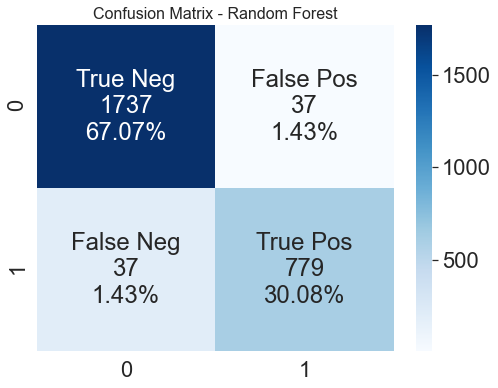

In [25]:
# Predicting results for test dataset
y_pred = forest.predict(X_test)

##Get the confusion matrix
forest_matrix = confusion_matrix(y_test, y_pred_forest)

## Confusion Matrix table

group_names = ['True Neg','False Pos','False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                forest_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     forest_matrix.flatten()/np.sum(forest_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)


# Labels, title and ticks
fig, ax = plt.subplots(figsize=(8, 6))
sns.set(font_scale=2.0) # Adjust to fit
title_font = {'size':'16'}  # Adjust to fit
ax.set_title('Confusion Matrix - Random Forest', fontdict=title_font);

# plot
sns.heatmap(tree_matrix, annot=labels, fmt='', cmap='Blues', ax=ax)

## CNN Model

In [26]:
#importing required packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, Conv1D, MaxPool1D, Dropout, Input
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold

In [27]:
# Reshaping data as expected by Sequential model
# convert to 3 dim array

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)

X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)

X_val = X_val.reshape(X_val.shape[0], X_val.shape[1],1)

print("3 dim array as expected by cnn model")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("X_val:", X_val.shape)


3 dim array as expected by cnn model
X_train: (7768, 15, 1)
X_test: (2590, 15, 1)
X_val: (2590, 15, 1)


## Evaluating CNN Model Traditionally (No KFold or Cross Validation)

In [28]:
# CNN model

#importing required packages

import tensorflow as tf
import tensorflow.keras as k

from tensorflow.keras import Sequential
from tensorflow.keras import models
from tensorflow.keras.layers import GlobalMaxPooling1D, Activation, Dense, Flatten, Conv1D, MaxPooling1D, Dropout, BatchNormalization
from keras import regularizers

from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l1
from sklearn.model_selection import KFold
import random as rn

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [29]:
tf.random.set_random_seed(29)

# Model configuration
ADAM = Adam(learning_rate=0.001)
verbosity = 2
l1 = regularizers.l1(0.001)

INPUT_DIM = X_train[0].shape
                                # Define the model architecture
#--Layer Name
proposed = Sequential(name="Proposed_Model")

    
#--Input Layer
proposed.add(Conv1D(20, 3, activation='relu', input_shape = INPUT_DIM))
                    #kernel_regularizer=l1))
proposed.add(BatchNormalization())
proposed.add(Dropout(0.2))

#--Convo Layer 1
proposed.add(Conv1D(20, 3, activation='relu', padding='same', name="CONV_1"))
proposed.add(MaxPooling1D(2, name="POOLING_1"))

#--Convo Layer 2
proposed.add(Conv1D(40, 3, activation='relu', padding='same', name="CONV_2", kernel_regularizer=l1))
#--Convo Layer 3
proposed.add(Conv1D(40, 3, activation='relu', padding='same', name="CONV_3"))
#--Convo Layer 4
proposed.add(Conv1D(40, 5, activation='relu', padding='same', name="CONV_4"))
proposed.add(MaxPooling1D(2, name="POOLING_2", padding='same'))


#--Convo Layer 5
proposed.add(Conv1D(80, 3, activation='relu', padding='same', name="CONV_5", kernel_regularizer=l1))
#--Convo Layer 6
proposed.add(Conv1D(80, 3, activation='relu', padding='same', name="CONV_6"))
#--Convo Layer 7
proposed.add(Conv1D(160, 3, activation='relu', padding='same', name="CONV_7"))
proposed.add(MaxPooling1D(2, name="POOLING_3", padding='same'))
proposed.add(Dropout(0.4, name="DROPOUT_1"))

    
##-----Fully Connected Layer
proposed.add(Flatten(name="FC"))


##--First Fully Connected Layer 5
proposed.add(Dense(128, activation='relu', name='DENSE_1', kernel_regularizer=l1))

proposed.add(Dense(64, activation='relu', name='DENSE_2'))
proposed.add(Dropout(0.5, name="DROPOUT_2"))
    
##--Fully Connected Output Layer
proposed.add(Dense(2, activation='softmax', name="OUTPUT"))

# Compile the model
proposed.compile(loss='sparse_categorical_crossentropy',
              optimizer=ADAM, metrics=['accuracy'])


In [30]:
proposed.summary()

Model: "Proposed_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 13, 20)            80        
_________________________________________________________________
batch_normalization (BatchNo (None, 13, 20)            80        
_________________________________________________________________
dropout (Dropout)            (None, 13, 20)            0         
_________________________________________________________________
CONV_1 (Conv1D)              (None, 13, 20)            1220      
_________________________________________________________________
POOLING_1 (MaxPooling1D)     (None, 6, 20)             0         
_________________________________________________________________
CONV_2 (Conv1D)              (None, 6, 40)             2440      
_________________________________________________________________
CONV_3 (Conv1D)              (None, 6, 40)          

In [31]:

## Train the Model

print('Building model... \n')

history = proposed.fit(X_train, y_train, validation_data=(X_val, y_val), 
                    batch_size=128, epochs=60, verbose=2)

# Score metrics from the model
print('')
score = proposed.evaluate(X_test, y_test, verbose=2)

# Displays the accuracy of correct sentiment prediction over test data
print('')
print("Test loss: %.2f%%" % score[0])
print("Test accuracy: %.2f%%" % (score[1]*100))



Building model... 

Train on 7768 samples, validate on 2590 samples
Epoch 1/60
7768/7768 - 1s - loss: 2.4654 - acc: 0.8908 - val_loss: 1.6296 - val_acc: 0.9282


/Users/jillkathleen/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Epoch 2/60
7768/7768 - 1s - loss: 0.9639 - acc: 0.9449 - val_loss: 0.6835 - val_acc: 0.9359
Epoch 3/60
7768/7768 - 1s - loss: 0.5028 - acc: 0.9511 - val_loss: 0.4555 - val_acc: 0.9456
Epoch 4/60
7768/7768 - 1s - loss: 0.3765 - acc: 0.9529 - val_loss: 0.3668 - val_acc: 0.9440
Epoch 5/60
7768/7768 - 1s - loss: 0.3128 - acc: 0.9517 - val_loss: 0.2948 - val_acc: 0.9614
Epoch 6/60
7768/7768 - 1s - loss: 0.2752 - acc: 0.9573 - val_loss: 0.2539 - val_acc: 0.9537
Epoch 7/60
7768/7768 - 1s - loss: 0.2400 - acc: 0.9570 - val_loss: 0.2196 - val_acc: 0.9641
Epoch 8/60
7768/7768 - 1s - loss: 0.2205 - acc: 0.9571 - val_loss: 0.1988 - val_acc: 0.9641
Epoch 9/60
7768/7768 - 1s - loss: 0.2076 - acc: 0.9579 - val_loss: 0.1842 - val_acc: 0.9645
Epoch 10/60
7768/7768 - 1s - loss: 0.1892 - acc: 0.9611 - val_loss: 0.1744 - val_acc: 0.9656
Epoch 11/60
7768/7768 - 1s - loss: 0.1808 - acc: 0.9611 - val_loss: 0.1769 - val_acc: 0.9633
Epoch 12/60
7768/7768 - 1s - loss: 0.1714 - acc: 0.9604 - val_loss: 0.1592 - v

In [32]:

## Evaluate model scores

acc_train_cnn = (proposed.evaluate(X_train, y_train)[1]*100)
acc_test_cnn = (proposed.evaluate(X_test, y_test)[1]*100)
acc_val_cnn = (proposed.evaluate(X_val, y_val)[1]*100)

print("batch_size=128, epochs=60")
print('')
print("CNN: Accuracy on training Data: %.2f%%" % (acc_train_cnn))
print("CNN: Accuracy on TEST Data: %.2f%%" % (acc_test_cnn))
print("CNN: Accuracy on validation Data: %.2f%%" % (acc_val_cnn))



batch_size=128, epochs=60

CNN: Accuracy on training Data: 97.32%
CNN: Accuracy on TEST Data: 97.30%
CNN: Accuracy on validation Data: 96.83%


In [33]:

#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('CNN', acc_train_cnn, acc_test_cnn, acc_val_cnn)


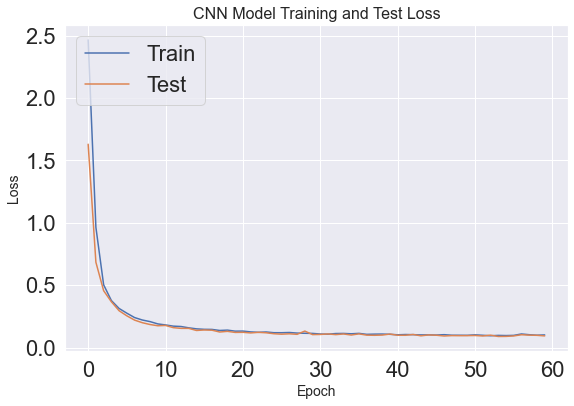

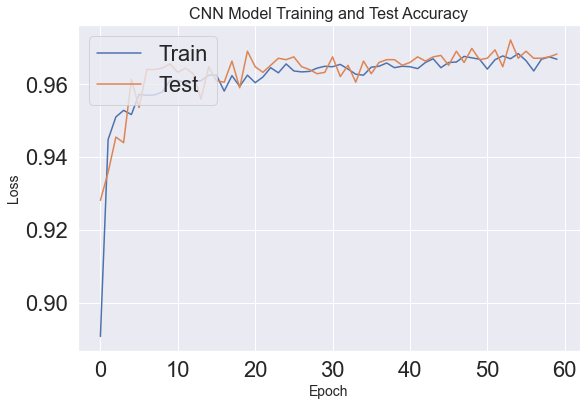

In [34]:
## As shown in docu

## Plot training & test loss values
## Computing Loss Result on Training And Test Results
plt.figure(figsize=(9,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN Model Training and Test Loss', fontsize=16)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('/Users/jillkathleen/Desktop/Phishing-Analysis-Detection/Back-End/Model-ntbk/Graph-Visuals/val-loss.png')
plt.show()


## Plot training & test accuracy values
## Computing Accuracy on Training And Test Results
plt.figure(figsize=(9,6))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('CNN Model Training and Test Accuracy', fontsize=16)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('/Users/jillkathleen/Desktop/Phishing-Analysis-Detection/Back-End/Model-ntbk/Graph-Visuals/test-acc-docu.png')
plt.show()


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


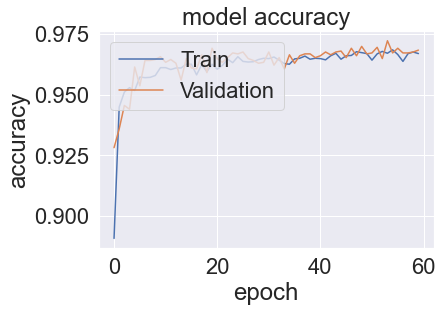

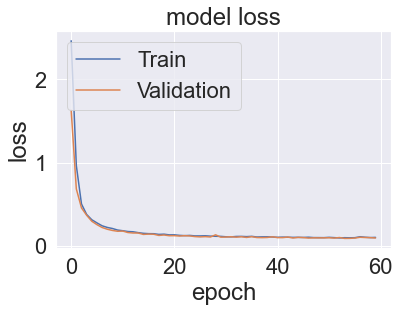

In [35]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Comparison of Models

In [37]:
acc_train, acc_test, acc_val

(['92.24%', '97.90%', '97.32%'],
 ['92.12%', '97.14%', '97.30%'],
 ['92.08%', '96.64%', '96.83%'])

In [39]:
results = ({'ML Model':  ML_Model,    
    'Train Accuracy':   acc_train,
    'Test Accuracy':   acc_test,
    'Val Accuracy':   acc_val})

# Create DataFrame  
df = pd.DataFrame(results)

# Set Index
index_df = df.set_index([pd.Index([1,2,3])])

# Set alignment
align_df = index_df.style.set_properties(**{'text-align': 'center'})

print("Dataset 1 Results")
align_df

Dataset 1 Results


,ML Model,Train Accuracy,Test Accuracy,Val Accuracy
1,Decision Tree,92.24%,92.12%,92.08%
2,Random Forest,97.90%,97.14%,96.64%
3,CNN,97.32%,97.30%,96.83%


In [40]:
#Sorting the dataframe on accuracy
index_df.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy,Val Accuracy
3,CNN,97.32%,97.30%,96.83%
2,Random Forest,97.90%,97.14%,96.64%
1,Decision Tree,92.24%,92.12%,92.08%


# CNN Prediction

In [41]:
y_pred = proposed.predict_classes(X_test, batch_size=128, verbose=2)

/Users/jillkathleen/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jillkathleen/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [43]:
## Decision Tree and Random Forest



# CNN Visualization

In [44]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title='Normalized confusion matrix'
    else:
        title='Confusion matrix'

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
## multiclass or binary report
## If binary (sigmoid output), set binary parameter to True
def full_multiclass_report(model,
                           x,
                           y_true,
                           classes,
                           batch_size=32,
                           binary=False):

    # 1. Transform one-hot encoded y_true into their class number
    if not binary:
        y_true = np.argmax(y_true,axis=1)
    
    # 2. Predict classes and stores in y_pred
    y_pred = model.predict_classes(x, batch_size=batch_size)
    
    # 3. Print accuracy score
    print("Accuracy : "+ str(accuracy_score(y_true,y_pred)))
    
    print("")
    
    # 4. Print classification report
    print("Classification Report")
    print(classification_report(y_true,predictions,digits=5))    
    
    # 5. Plot confusion matrix
    cnf_matrix = confusion_matrix(y_true,predictions)
    print(cnf_matrix)
    plot_confusion_matrix(cnf_matrix,classes=classes)

In [45]:
from sklearn.metrics import classification_report, accuracy_score, make_scorer
from sklearn.model_selection import cross_val_score

def classification_report_with_accuracy_score(y_test, predictions):

    print (classification_report(y_test, predictions)) # print classification report
    return accuracy_score(y_test, predictions) # return accuracy score

In [46]:
from sklearn.metrics import confusion_matrix,classification_report

# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
# Predict the values from the test set

print('Confusion Matrix')
print(confusion_matrix(y_test, predictions))

print('')
print('Classification Report')
target_names = ['Phishing', 'Benign']
print(classification_report(y_test, predictions, target_names=target_names))

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, predictions)
print('Accuracy: %.2f%%' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, predictions)
print('Precision: %.2f%%' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, predictions)
print('Recall: %.2f%%' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, predictions)
print('F1 score: %.2f%%' % f1)

Confusion Matrix


NameError: name 'predictions' is not defined

# CNN Confusion Matrix

In [47]:
#y = LabelEncoder().fit_transform(dataset_2[label].values)

y = dataset_shuffle['label'].values
cm = confusion_matrix(y_test, prediction_y)
sns.heatmap(cm, cmap='Blues', annot=True, fmt='g', xticklabels=['Benign', 'Phishing'],
        yticklabels=['Benign', 'Phishing'])

NameError: name 'prediction_y' is not defined